In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
energy = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')


In [3]:
energy.shape

(4383, 5)

In [8]:
energy.sample(5)

,Date,Consumption,Wind,Solar,Wind+Solar
184,2006-07-04,1356.526,NaN,NaN,NaN
1429,2009-11-30,1446.871,NaN,NaN,NaN
605,2007-08-29,1422.812,NaN,NaN,NaN
2961,2014-02-09,1252.107,423.278,44.165,467.443
1970,2011-05-25,1396.676,83.832,NaN,NaN


In [9]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [23]:
energy['Date']

0      2006-01-01
1      2006-01-02
2      2006-01-03
3      2006-01-04
4      2006-01-05
          ...    
4378   2017-12-27
4379   2017-12-28
4380   2017-12-29
4381   2017-12-30
4382   2017-12-31
Name: Date, Length: 4383, dtype: datetime64[ns]

In [12]:
energy['Date'].isnull().any()

False

In [14]:
energy['Date'] = pd.to_datetime(energy['Date'])

In [24]:
energy.info(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [25]:
energy['Date']

0      2006-01-01
1      2006-01-02
2      2006-01-03
3      2006-01-04
4      2006-01-05
          ...    
4378   2017-12-27
4379   2017-12-28
4380   2017-12-29
4381   2017-12-30
4382   2017-12-31
Name: Date, Length: 4383, dtype: datetime64[ns]

In [26]:
energy = energy.set_index('Date')

In [27]:
energy.head(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [28]:
energy.isnull().mean()

Consumption    0.000000
Wind           0.333790
Solar          0.500799
Wind+Solar     0.501027
dtype: float64

In [30]:
energy.index[:5]

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [31]:
energy.index[:5].year

Int64Index([2006, 2006, 2006, 2006, 2006], dtype='int64', name='Date')

In [32]:
energy.index[:5].month

Int64Index([1, 1, 1, 1, 1], dtype='int64', name='Date')

In [33]:
energy.index[:5].day

Int64Index([1, 2, 3, 4, 5], dtype='int64', name='Date')

In [35]:
energy.index[:5].day_name()

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'], dtype='object', name='Date')

In [36]:
energy['Year'] = energy.index.year

In [37]:
energy.head()

,Consumption,Wind,Solar,Wind+Solar,Year
Date,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006
2006-01-02,1380.521,NaN,NaN,NaN,2006
2006-01-03,1442.533,NaN,NaN,NaN,2006
2006-01-04,1457.217,NaN,NaN,NaN,2006
2006-01-05,1477.131,NaN,NaN,NaN,2006


In [39]:
energy.Year.value_counts()

2016    366
2012    366
2008    366
2015    365
2011    365
2007    365
2014    365
2010    365
2006    365
2017    365
2013    365
2009    365
Name: Year, dtype: int64

In [40]:
energy['Month'] = energy.index.month
energy['day_name'] = energy.index.day_name()

In [41]:
energy.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday


In [42]:
 energy['is_weekend'] = energy.day_name.isin(["Sunday", "Saturday"]) 

In [43]:
energy.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name,is_weekend
Date,,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday,True
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday,False
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday,False
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday,False
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday,False


In [45]:
(energy.day_name == 'Saturday') | (energy.day_name == 'Sunday')

Date
2006-01-01     True
2006-01-02    False
2006-01-03    False
2006-01-04    False
2006-01-05    False
              ...  
2017-12-27    False
2017-12-28    False
2017-12-29    False
2017-12-30     True
2017-12-31     True
Name: day_name, Length: 4383, dtype: bool

In [50]:
 energy.Year.max()

2017

In [53]:
energy.loc["2010-05" : "2017-08"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name,is_weekend
Date,,,,,,,,
2010-05-01,1003.13300,71.799,NaN,NaN,2010,5,Saturday,True
2010-05-02,1025.53400,38.272,NaN,NaN,2010,5,Sunday,True
2010-05-03,1357.76000,42.253,NaN,NaN,2010,5,Monday,False
2010-05-04,1380.30700,97.348,NaN,NaN,2010,5,Tuesday,False
2010-05-05,1377.11100,94.939,NaN,NaN,2010,5,Wednesday,False
...,...,...,...,...,...,...,...,...
2017-08-27,1066.65900,130.055,147.845,277.900,2017,8,Sunday,True
2017-08-28,1369.09800,45.224,178.631,223.855,2017,8,Monday,False
2017-08-29,1409.36700,98.161,193.585,291.746,2017,8,Tuesday,False


In [54]:
energy.loc["2017"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name,is_weekend
Date,,,,,,,,
2017-01-01,1130.41300,307.125,35.291,342.416,2017,1,Sunday,True
2017-01-02,1441.05200,295.099,12.479,307.578,2017,1,Monday,False
2017-01-03,1529.99000,666.173,9.351,675.524,2017,1,Tuesday,False
2017-01-04,1553.08300,686.578,12.814,699.392,2017,1,Wednesday,False
2017-01-05,1547.23800,261.758,20.797,282.555,2017,1,Thursday,False
...,...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday,False
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday,False
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday,False


In [55]:
energy.loc["2016-12-23" : "2016-12-28"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name,is_weekend
Date,,,,,,,,
2016-12-23,1415.811,395.296,16.111,411.407,2016,12,Friday,False
2016-12-24,1195.354,681.509,12.843,694.352,2016,12,Saturday,True
2016-12-25,1117.673,719.778,6.608,726.386,2016,12,Sunday,True
2016-12-26,1121.213,718.160,15.463,733.623,2016,12,Monday,False
2016-12-27,1289.324,640.895,23.448,664.343,2016,12,Tuesday,False
2016-12-28,1294.881,214.990,19.450,234.440,2016,12,Wednesday,False


Consommation en au fil des années





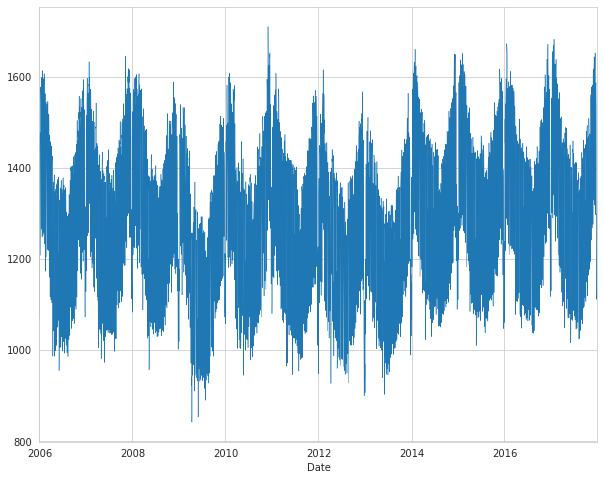

In [57]:
sns.set_style("whitegrid")
energy['Consumption'].plot(linewidth=.5 ,figsize=(10, 8))
plt.show()

Quel est le jour avec le plus de cosommation en global ?

In [61]:
 energy.groupby('day_name').groups

{'Friday': [2006-01-06 00:00:00, 2006-01-13 00:00:00, 2006-01-20 00:00:00, 2006-01-27 00:00:00, 2006-02-03 00:00:00, 2006-02-10 00:00:00, 2006-02-17 00:00:00, 2006-02-24 00:00:00, 2006-03-03 00:00:00, 2006-03-10 00:00:00, 2006-03-17 00:00:00, 2006-03-24 00:00:00, 2006-03-31 00:00:00, 2006-04-07 00:00:00, 2006-04-14 00:00:00, 2006-04-21 00:00:00, 2006-04-28 00:00:00, 2006-05-05 00:00:00, 2006-05-12 00:00:00, 2006-05-19 00:00:00, 2006-05-26 00:00:00, 2006-06-02 00:00:00, 2006-06-09 00:00:00, 2006-06-16 00:00:00, 2006-06-23 00:00:00, 2006-06-30 00:00:00, 2006-07-07 00:00:00, 2006-07-14 00:00:00, 2006-07-21 00:00:00, 2006-07-28 00:00:00, 2006-08-04 00:00:00, 2006-08-11 00:00:00, 2006-08-18 00:00:00, 2006-08-25 00:00:00, 2006-09-01 00:00:00, 2006-09-08 00:00:00, 2006-09-15 00:00:00, 2006-09-22 00:00:00, 2006-09-29 00:00:00, 2006-10-06 00:00:00, 2006-10-13 00:00:00, 2006-10-20 00:00:00, 2006-10-27 00:00:00, 2006-11-03 00:00:00, 2006-11-10 00:00:00, 2006-11-17 00:00:00, 2006-11-24 00:00:00, 2

In [59]:
 # Jour avec le plus de cosommation 
 energy.groupby('day_name').sum()['Consumption'].sort_values()  

day_name
Sunday       691646.51735
Saturday     751544.19949
Monday       870006.24492
Friday       873034.67157
Thursday     889645.06681
Tuesday      894101.79246
Wednesday    897437.69479
Name: Consumption, dtype: float64

In [64]:
 groupday = energy.groupby('day_name').sum()['Consumption'].reset_index()  
 groupday

,day_name,Consumption
0,Friday,873034.67157
1,Monday,870006.24492
2,Saturday,751544.19949
3,Sunday,691646.51735
4,Thursday,889645.06681
5,Tuesday,894101.79246
6,Wednesday,897437.69479


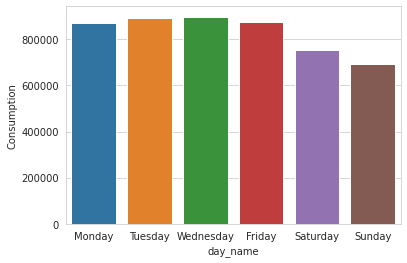

In [65]:
order = ['Monday','Tuesday','Wednesday','Friday','Saturday','Sunday']
sns.barplot(x = groupday['day_name'], y = groupday['Consumption'], order=order)
plt.show()

Consommation par année

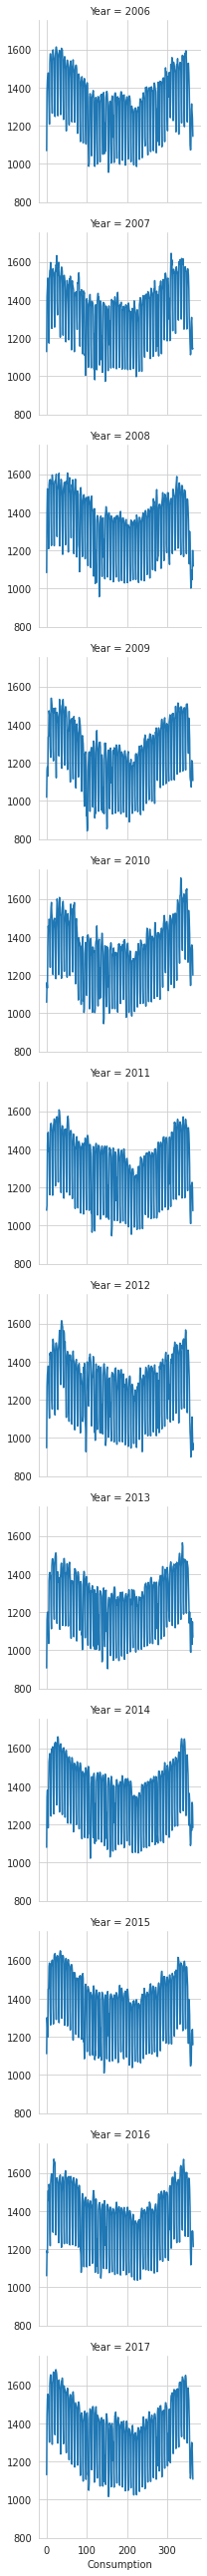

In [66]:
grid = sns.FacetGrid(energy, row="Year")
grid.map(plt.plot, 'Consumption')

In [67]:
data = energy.loc['2016'].copy()
data

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name,is_weekend
Date,,,,,,,,
2016-01-01,1060.366,107.209,18.563,125.772,2016,1,Friday,False
2016-01-02,1192.698,409.622,9.406,419.028,2016,1,Saturday,True
2016-01-03,1179.282,406.296,13.519,419.815,2016,1,Sunday,True
2016-01-04,1456.294,278.460,10.080,288.540,2016,1,Monday,False
2016-01-05,1506.737,206.468,12.549,219.017,2016,1,Tuesday,False
...,...,...,...,...,...,...,...,...
2016-12-27,1289.324,640.895,23.448,664.343,2016,12,Tuesday,False
2016-12-28,1294.881,214.990,19.450,234.440,2016,12,Wednesday,False
2016-12-29,1295.897,167.698,42.910,210.608,2016,12,Thursday,False


In [68]:
data.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

(735964.0, 736329.0)

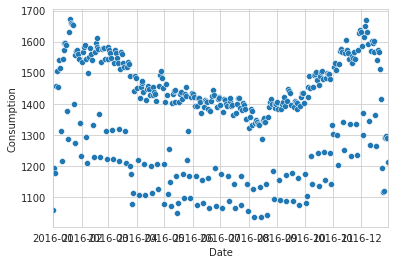

In [70]:
sns.scatterplot( x = data.index, y = data['Consumption'])
plt.xlim(data.index.min(), data.index.max())

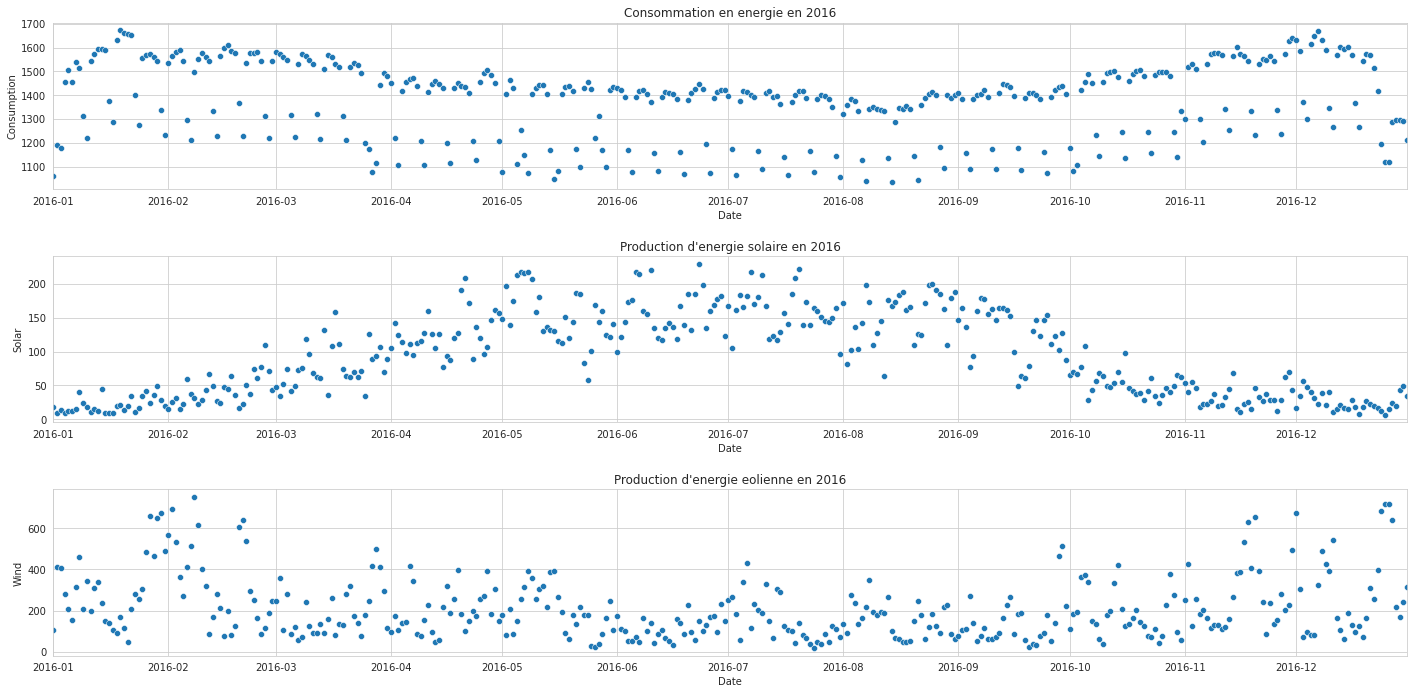

In [79]:
fig, axes = plt.subplots(figsize=(20, 10), nrows=3, ncols=1)

sns.scatterplot(data = data, x = data.index, y ='Consumption', ax = axes[0])
axes[0].set_title('Consommation en energie en 2016')
axes[0].set_xlim(data.index.min(), data.index.max())


sns.scatterplot(data = data, x = data.index, y ='Solar', ax = axes[1])
axes[1].set_title("Production d'energie solaire en 2016")
axes[1].set_xlim(data.index.min(), data.index.max())


sns.scatterplot(data = data, x = data.index, y ='Wind', ax = axes[2])
axes[2].set_title("Production d'energie eolienne en 2016")
axes[2].set_xlim(data.index.min(), data.index.max())
fig.tight_layout(pad=2)

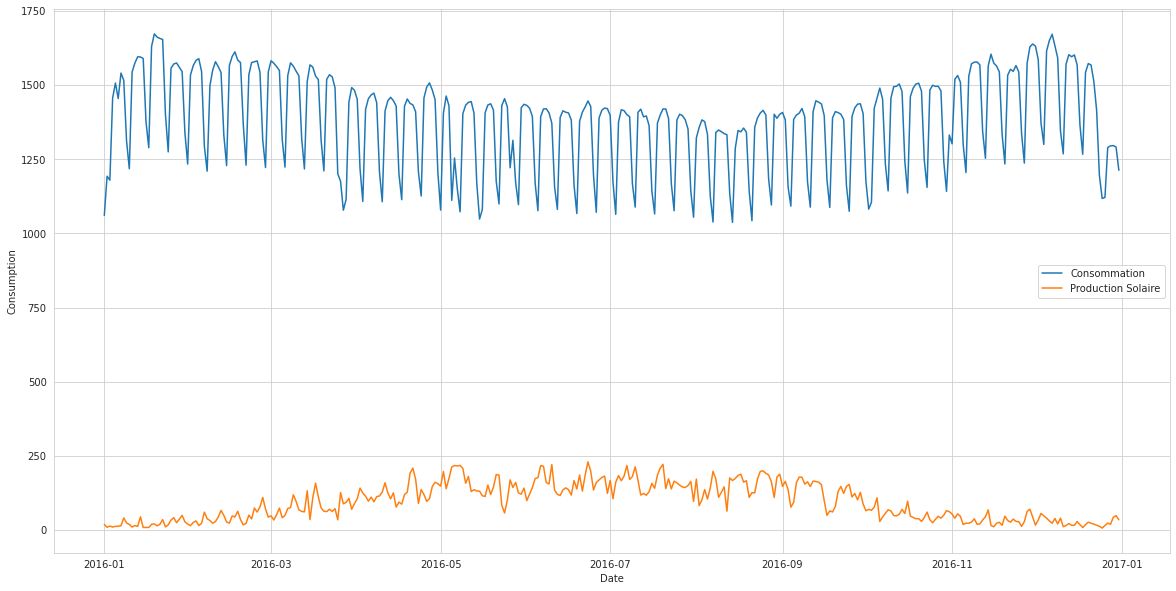

In [84]:
fig, ax = plt.subplots(figsize=(20, 10), nrows=1, ncols=1)
sns.lineplot(data=data, x = data.index, y = 'Consumption', ax=ax, legend='brief', label='Consommation')

sns.lineplot(data=data, x = data.index, y = 'Solar', ax=ax, legend='brief', label='Production Solaire')



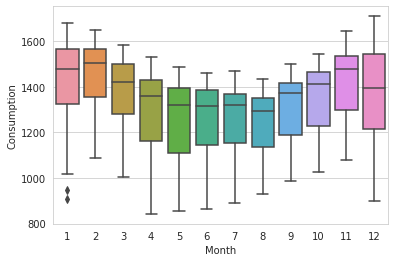

In [89]:

sns.boxplot(data=energy, x = "Month", y = 'Consumption')

In [90]:
energy["day_name"].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

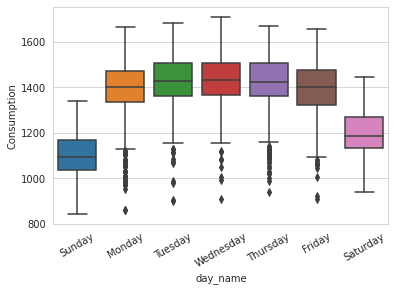

In [95]:
g = sns.boxplot(data=energy, x = "day_name", y = 'Consumption')
g.set_xticklabels(rotation=30, labels=energy["day_name"].unique())
plt.show()

Consommation en semaine vs Weekend

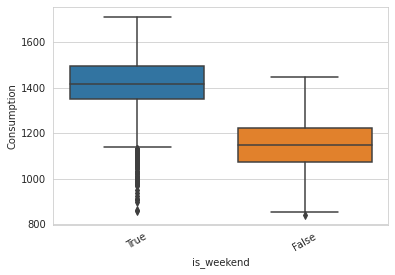

In [96]:
g = sns.boxplot(data=energy, x = "is_weekend", y = 'Consumption')
g.set_xticklabels(rotation=30, labels=energy["is_weekend"].unique())
plt.show()

Consommation par semaine

In [97]:
energy.drop(["Year","Month","is_weekend"], axis=1).resample('W').mean()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571


Consommation moyenne par Mois

In [99]:
Conso_par_mois = energy.drop(["Year","Month","is_weekend"], axis=1).resample('M').mean()
Conso_par_mois

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,1461.442065,NaN,NaN,NaN
2006-02-28,1467.106893,NaN,NaN,NaN
2006-03-31,1418.649161,NaN,NaN,NaN
2006-04-30,1275.058900,NaN,NaN,NaN
2006-05-31,1253.488484,NaN,NaN,NaN
...,...,...,...,...
2017-08-31,1291.283022,177.412839,148.477677,325.890516
2017-09-30,1335.952031,209.591000,102.643033,312.234033
2017-10-31,1366.297385,402.583774,68.727645,471.311419


Consommation par trimestre

In [101]:
 Conso_par_trim = energy.drop(["Year","Month","is_weekend"], axis=1).resample('Q').mean()
 Conso_par_trim 

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-03-31,1448.464678,NaN,NaN,NaN
2006-06-30,1256.740220,NaN,NaN,NaN
2006-09-30,1268.088424,NaN,NaN,NaN
2006-12-31,1387.817609,NaN,NaN,NaN
2007-03-31,1434.139633,NaN,NaN,NaN
2007-06-30,1278.652451,NaN,NaN,NaN
2007-09-30,1304.044261,NaN,NaN,NaN
2007-12-31,1426.411250,NaN,NaN,NaN
2008-03-31,1445.339879,NaN,NaN,NaN
